In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

/Users/gditzler/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


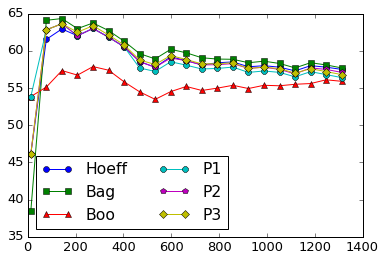

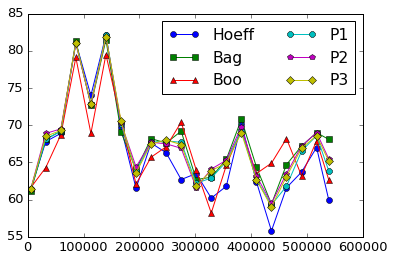

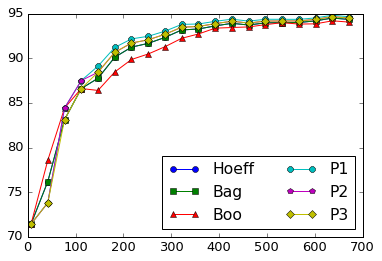

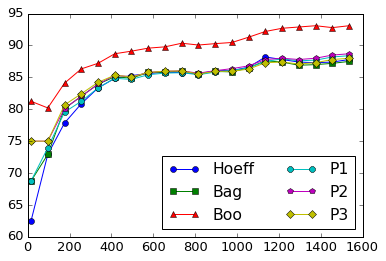

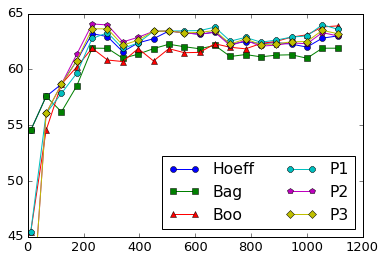

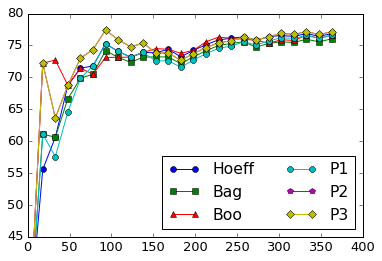

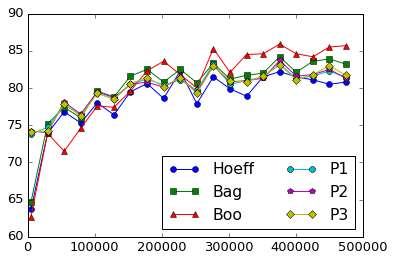

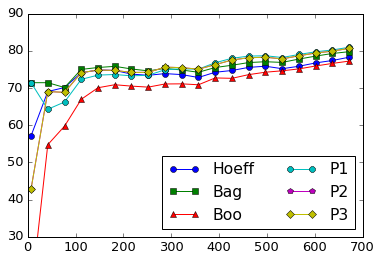

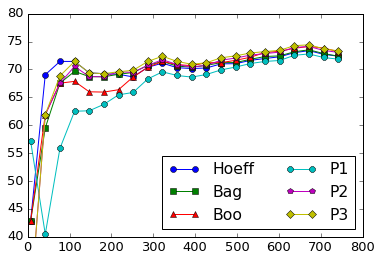

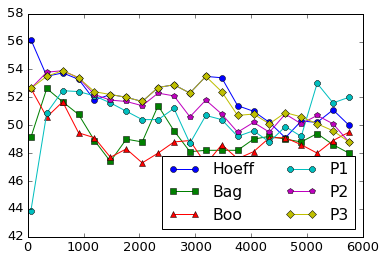

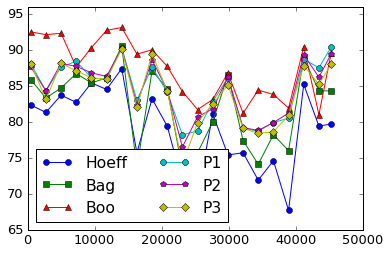

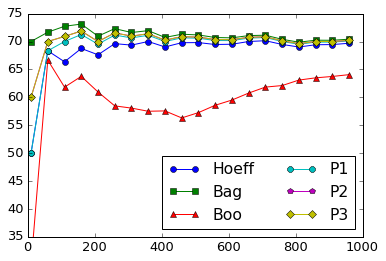

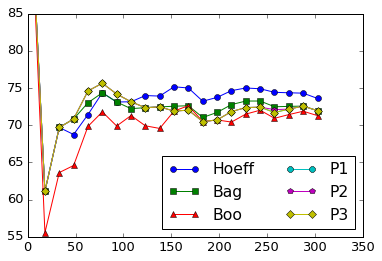

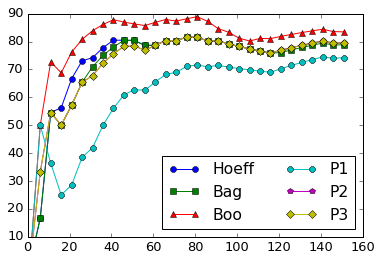

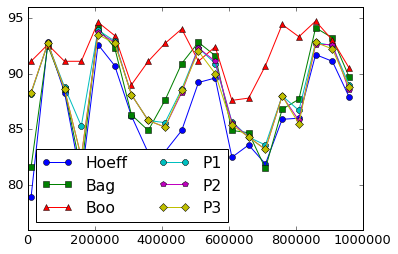

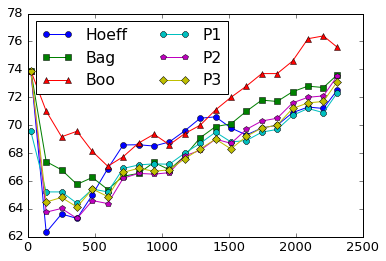

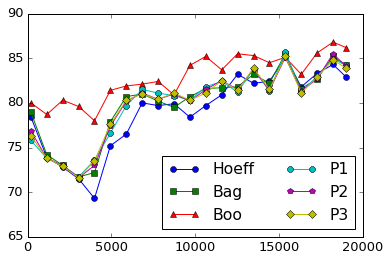

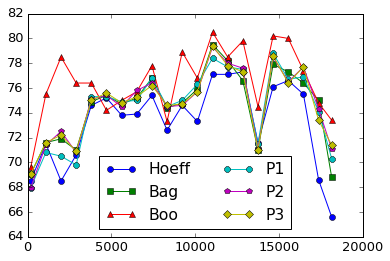

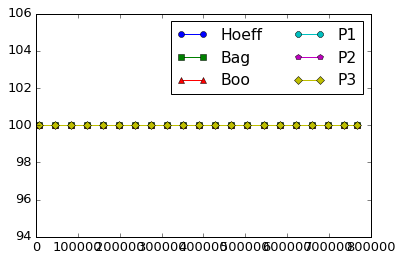

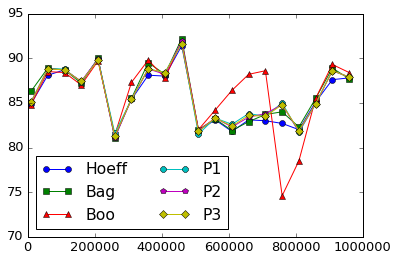

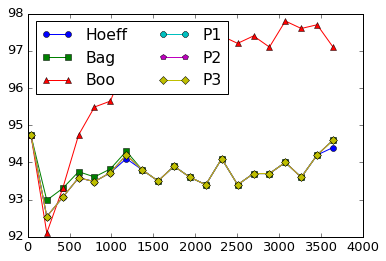

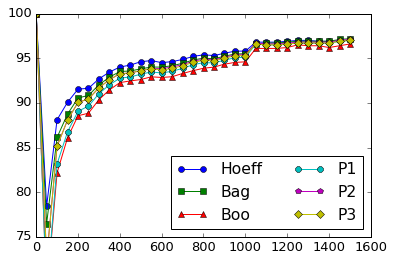

In [50]:
pth = 'outputs/'
base = 'hoeff'
algs = [base, 'bagging-'+base, 'boosting-'+base, 'pame1-'+base, 'pame2-'+base, 'pame3-'+base]
# 'spam' 
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,'magic' ,'noaa' ,'poker' ,'sea' ,'sick' ,'splice_v2']
#datas = ['image' ,'magic' ,'noaa' ,'poker' ,'sea' ,'sick' ,'splice_v2']
nalg = len(algs)
ndatas = len(datas)
F = 'classifications correct (percent)'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], [42,58], [65,96], [35,75], [55,85], [10,90], [76,96],
       [62,78],[65,90],[64,82],[94,106],[70,95],[92,98],[75,100]]


accs = np.zeros((ndatas, nalg))

for j in range(ndatas):
    z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
                
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[F][t], marker=mrk[i])
        accs[j, i] = df[F].mean()
    
    
    plt.ylim(z[0],z[1])
    plt.legend(["Hoeff", "Bag", "Boo", "P1", "P2", "P3"], ncol=2, loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'error.pdf', format='pdf')


In [75]:
Z = np.zeros((nalg, nalg))
ranks = np.zeros((ndatas, nalg))
for i in range(ndatas):
    ranks[i] = nalg-np.argsort(accs[i])
R = ranks.mean(axis=0)

# chi-squared stat
XF = 12*ndatas/(nalg*(nalg+1)) * ((R**2).sum() - (nalg*(nalg+1)**2)/4)
FF = (ndatas-1)*XF/(ndatas*(nalg-1)-XF)

for i in range(nalg):
    for j in range(nalg):
        Z[i,j] = (R[i]-R[j])/(np.sqrt(1.*(nalg*(nalg+1))/(6*ndatas)))

In [77]:
Z

array([[ 0.        ,  1.12815215,  3.06212726,  3.54562104,  1.93397511,
         0.96698756],
       [-1.12815215,  0.        ,  1.93397511,  2.41746889,  0.80582296,
        -0.16116459],
       [-3.06212726, -1.93397511,  0.        ,  0.48349378, -1.12815215,
        -2.09513971],
       [-3.54562104, -2.41746889, -0.48349378,  0.        , -1.61164593,
        -2.57863348],
       [-1.93397511, -0.80582296,  1.12815215,  1.61164593,  0.        ,
        -0.96698756],
       [-0.96698756,  0.16116459,  2.09513971,  2.57863348,  0.96698756,
         0.        ]])

In [35]:
df[F]
range(0, 100, 5)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]